# With deep learning algorithms

In [3]:
# Move to the working folder
%cd "./EPGS"

from models.Segmentation import EPGS
from models.SegmentationML import EPGS_ML
from models.NN import *

#Autoreload utilities
%load_ext autoreload
%autoreload 2

[WinError 2] The system cannot find the file specified: './EPGS'
c:\Dung\EPG_project\EPGS


## training

In [9]:
# Model configurations
from utils.configs_utils import process_config
config = process_config('fcn.combined_data.256.json')
config 
# You can create/adjust the *.json configuration files in the configs folder "./EPGS/configs/your_config_files.json"

{'exp_name': 'combined_data',
 'dataset_name': 99,
 'window_size': 1024,
 'hop_length': 1024,
 'arch': 'fcn',
 'method': 'raw',
 'scale': True,
 'outlier_filter': False,
 'optimizer': 'Adam',
 'n_epochs': 100,
 'lr': 0.0001,
 'batch_size': 256,
 'scope': 1,
 'data_path': './data',
 'device': 'cuda',
 'timestamp': '2024-05-07 10:17:59'}

In [12]:
epgs = EPGS(config)
epgs.train(early_stop=False)

Obtaining dataloders ...
Read 332 recordings
Signal processing method: raw | Outliers filtering: False | Scale: True
Class distribution (label:ratio): 1: 0.13, 2: 0.24, 4: 0.04, 5: 0.29, 6: 0.04, 7: 0.08, 8: 0.19
Labels map (from:to): {1: 0, 2: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6}
Train, validate, test set sizes: (734297, 293719, 114224)
Input shape: (256, 1, 1024)
Training...
Epoch [1/100] | Train loss: 0.8792| Val. loss: 0.7193 | Train acc: 0.6916 | Val. acc: 0.7400
Epoch [11/100] | Train loss: 0.3143| Val. loss: 0.8265 | Train acc: 0.8938 | Val. acc: 0.7700
Epoch [21/100] | Train loss: 0.2655| Val. loss: 0.5562 | Train acc: 0.9106 | Val. acc: 0.8300
Accuracy : 0.82, Average f1: 0.81
Class accuracy: [0.88, 0.74, 0.93, 0.78, 0.92, 0.98, 0.91]
Finished testing!
Parameters saved to "./checkpoints/fcn/fcn_combined_20.json.2024-05-07.combined_data.json".
Epoch [31/100] | Train loss: 0.2423| Val. loss: 0.8408 | Train acc: 0.9180 | Val. acc: 0.7900
Epoch [41/100] | Train loss: 0.2269| Val. loss

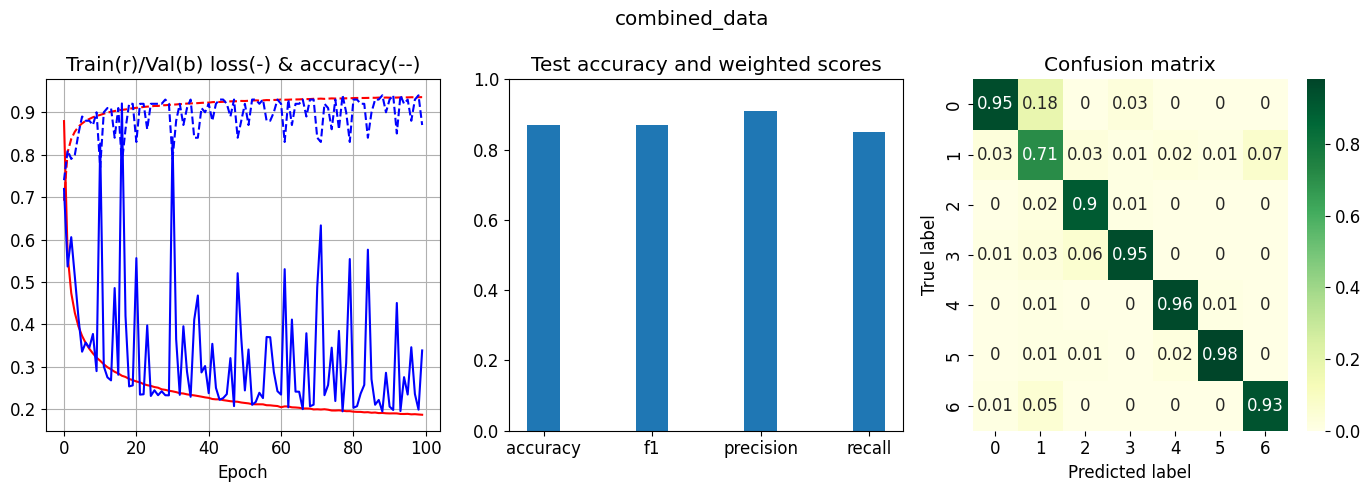

In [13]:
epgs.plot_train_result()

In [14]:
epgs.write_train_log()

## segmentation

In [8]:
# Model configurations
from utils.configs_utils import process_config
config = process_config('fcn.combined_data.256.json')
config 
# You can create/adjust the *.json configuration files in the configs folder "./EPGS/configs/your_config_files.json"

{'exp_name': 'combined_data',
 'dataset_name': 99,
 'window_size': 1024,
 'hop_length': 1024,
 'arch': 'fcn',
 'method': 'raw',
 'scale': True,
 'outlier_filter': False,
 'optimizer': 'Adam',
 'n_epochs': 100,
 'lr': 0.0001,
 'batch_size': 256,
 'scope': 1,
 'data_path': '../data',
 'device': 'cuda',
 'timestamp': '2024-05-07 12:28:29'}

In [13]:
import os 

os.listdir(f'{epgs.data_path}/0ct_ANA')

['0ct_2023_3-2-ch2.ANA',
 '0ct_2023_3-2-ch3.ANA',
 '0ct_2023_3-2-ch6.ANA',
 '0ct_2023_3-2-ch8.ANA',
 '0ct_2023_3_12-ch1.ANA',
 '0ct_2023_3_12-ch7.ANA',
 '0ct_2023_3_12-ch8.ANA',
 '0ct_2023_3_13-ch1.ANA',
 '0ct_2023_3_13-ch3.ANA',
 '0ct_2023_3_13-ch7.ANA',
 '0ct_7_27_2023-ch7.ANA',
 '0ct_7_28_2023-ch1.ANA',
 '0ct_7_28_2023-ch2.ANA',
 '0ct_7_28_2023-ch5.ANA',
 '0ct_7_28_2023-ch6.ANA',
 '0ct_7_28_2023-ch7.ANA',
 '0ct_7_28_2023-ch8.ANA']

In [10]:
epgs = EPGS(config)
# load a trained model
cp = 'fcn_combined_50.json.2024-05-07.combined_data.json'
epgs.load_checkpoint(cp)

In [17]:
# predict 
pred_ana = epgs.segment(recording_name='0ct_2023_3-2-ch2')

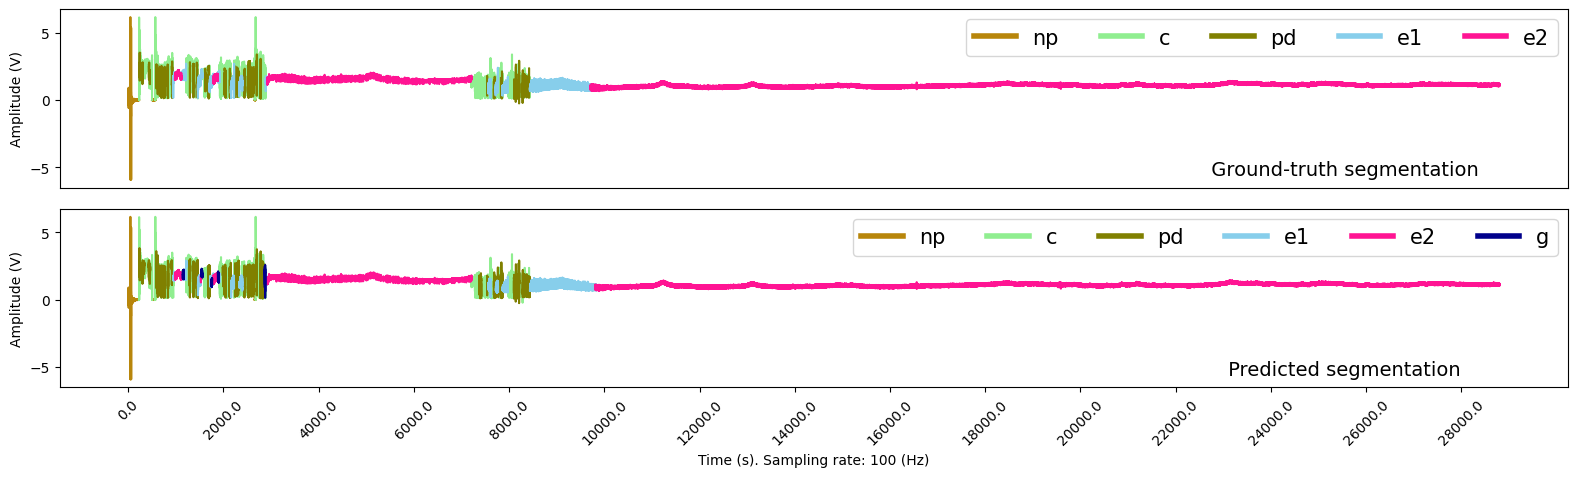

In [18]:
# plot 
epgs.plot_segmentation(which = 'pred_vs_gt', savefig = False, name = '0ct_2023_3-2-ch2')

# With traditional machine learning algorithms

In [20]:
from utils.configs_utils import process_config

config = process_config('XGB.combined_data.json')
config 

{'exp_name': 'combined_data',
 'dataset_name': 99,
 'model': 'XGB',
 'window_size': 1024,
 'hop_length': 1024,
 'method': 'raw',
 'scale': True,
 'outlier_filter': False,
 'scope': 1,
 'data_path': '../data',
 'device': 'cuda',
 'timestamp': '2024-05-07 12:33:59'}

In [ ]:
# generate data
# This is going to take a long time
from dataset_utils.MLdatagenerator import compute_features_matrix 
compute_features_matrix(config.dataset_name, config.window_size, config.hop_length)

In [21]:
from dataset_utils.MLdatagenerator import read_dataset_from_config
from models.SegmentationML import EPGS_ML

epg = EPGS_ML(config)

X_train, X_test, y_train, y_test = read_dataset_from_config(config)

epg.fit(X_train, y_train)

# # save model
# import os 
# os.makedirs('./checkpoints/XGB', exist_ok= True)
# epg.model.save_model('./checkpoints/XGB/XGB_model.json')

# # load xgb_model 
# from xgboost import XGBClassifier
# epg.model = XGBClassifier(n_jobs = -1, n_estimators = 300, max_depth = 6, eta = 0.3)
# epg.model.load_model('./checkpoints/XGB/XGB_model.json')

Training...
Finished training. Elapsed time: 151.366 (s)


In [34]:
# testing recognizability
pred = epg.predict(X_test, y_test)

Predicting ...
Accuracy: 0.94, f1: 0.94
Finished testing.


In [37]:
# segmentation
pred_ana = epg.segment('SBA-Rag5_2-8-2016-ch8')
epg.save_analysis()

Generating segmentation ...


100%|██████████| 2812/2812 [00:17<00:00, 158.36it/s]


Overlapping rate: 0.9149756944444445


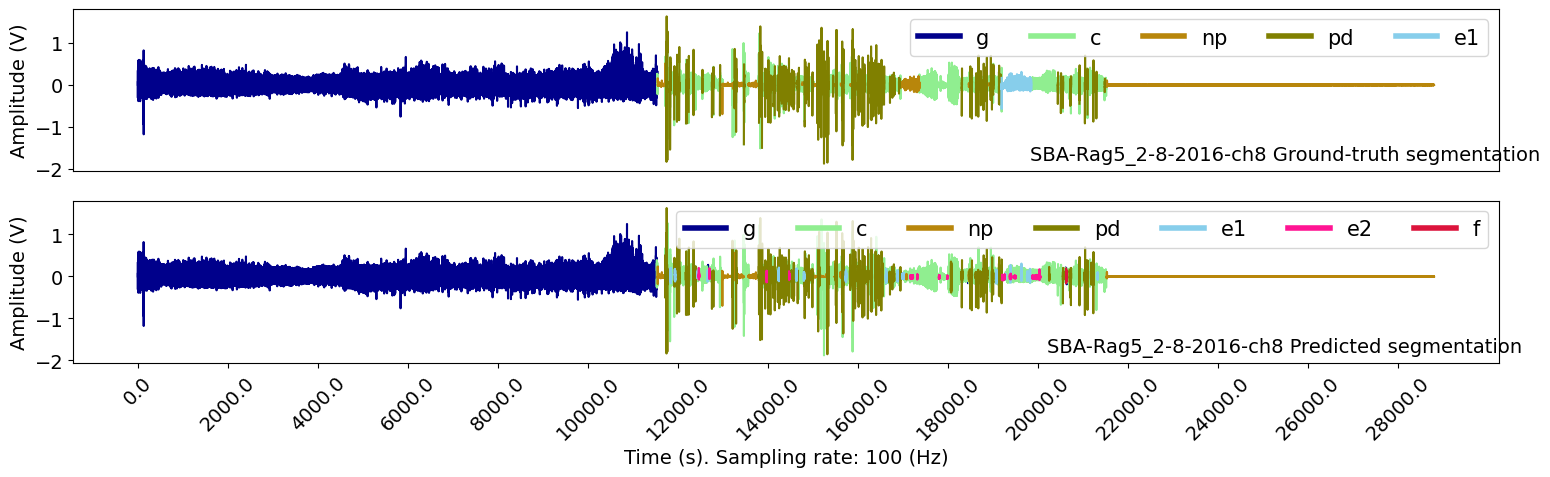

In [27]:
# import matplotlib.pyplot as plt 
# plt.figure(figsize = (18, 3))
# epg.pred_proba.shape 
# epg.plot_pred_proba([1200000,1400000])
epg.plot_segmentation(which = 'pred_vs_gt')

In [ ]:
# cross_validation 
epg.cross_validate(keep_best_model=False)
epg.write_cv_log()
epg.write_test_result()